In [4]:
cd -q ~/TaskSCCA_craddock/

In [91]:
import matplotlib.pyplot as plt

import pickle
import pandas as pd
import numpy as np
import seaborn as sns

from src.utils import unflatten, save_pkl, load_pkl, is_outliers, imputedata

from statsmodels.multivariate.manova import MANOVA
from scipy.stats import zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style({"font.sans-serif": ["Arial"]})
sns.set_context('paper', font_scale=1.5)

In [6]:
from statsmodels.stats.multitest import multipletests

# Prepare data

In [69]:
df_CT = pd.read_csv('reports/TaskCCA_CorticalThickness_Annotated.csv', index_col=0)

## Check how the parameter est. was calculated

From the previous MANOVA in 6.1 and 6.2, we learned that SCCA mode 2 is associated with a stable pattern across different days/tasks.  
Based on this result, we extracts the variance in thoughts best at expalining SCCA mode 2 with linear reaction and see if this pattern can be explained by the structural differences revealed through cortical thickness. 

In [83]:
from sklearn.linear_model import LinearRegression

pe_MDES_CCA2 = LinearRegression()
pe_MDES_CCA2.fit(X=df_CT.loc[:, 'MWQ_Deliberate':'MWQ_Words'].values, y=df_CT.loc[:, 'SCCA_mean_2'].values)
para_est = pe_MDES_CCA2.predict(X=df_CT.loc[:, 'MWQ_Deliberate':'MWQ_Words'].values)

In [86]:
np.corrcoef(para_est, df_CT.parameter_estimates_MDES)

array([[1., 1.],
       [1., 1.]])

In [92]:
model = smf.ols(formula="""parameter_estimates_MDES
                                     ~ AGE + GENDER + SCCA_mean_2 + meanCT_fc2 + meanCT_task2
                                     + SCCA_mean_2:meanCT_fc2
                                     + SCCA_mean_2:meanCT_task2
                                     + meanCT_task2:meanCT_fc2 """, 
                            data=df_CT)
print(model.fit().summary())

                               OLS Regression Results                               
Dep. Variable:     parameter_estimates_MDES   R-squared:                       0.233
Model:                                  OLS   Adj. R-squared:                  0.193
Method:                       Least Squares   F-statistic:                     5.834
Date:                      Wed, 10 Jul 2019   Prob (F-statistic):           1.65e-06
Time:                              16:59:37   Log-Likelihood:                -209.21
No. Observations:                       163   AIC:                             436.4
Df Residuals:                           154   BIC:                             464.3
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [103]:
df

,parameter_estimates_MDES,bin_CCA,binCT_fc2,id
RIDNO,,,,
R4282,-0.241907,Top 50%,Top 50%,R4282
R4545,0.417885,Bottom 50%,Top 50%,R4545
R4286,-0.483134,Top 50%,Top 50%,R4286
R4280,-0.746019,Top 50%,Top 50%,R4280
R4273,-1.148046,Top 50%,Top 50%,R4273
R4320,-0.586046,Top 50%,Top 50%,R4320
R4236,-0.528658,Top 50%,Top 50%,R4236
R4191,-1.546419,Top 50%,Top 50%,R4191
R4500,0.730872,Bottom 50%,Top 50%,R4500


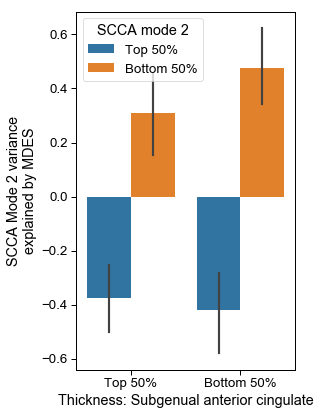

In [143]:
df_CT = df_CT.sort_values('SCCA_mean_2')

df_CT['bin_CCA'] = pd.qcut(df_CT['SCCA_mean_2'], 2, 
                         labels=['Top 50%', 'Bottom 50%'])
df_CT = df_CT.sort_values('meanCT_fc2')
df_CT['binCT_fc2'] = pd.qcut(df_CT['meanCT_fc2'], 2, 
                         labels=['Top 50%', 'Bottom 50%'])

df = df_CT.loc[:, ('parameter_estimates_MDES', 'bin_CCA', 'binCT_fc2')]
df.columns = ['SCCA Mode 2 variance\nexplained by MDES', 'SCCA mode 2', 'Thickness: Subgenual anterior cingulate']

fig, ax = plt.subplots(figsize=(4.5, 6))
#If you have normall`y distributed data, 
# then the 68% confidence interval will correspond to the standard error of the mean.
sns.barplot(x='Thickness: Subgenual anterior cingulate', 
                y='SCCA Mode 2 variance\nexplained by MDES', 
                hue='SCCA mode 2', 
                data=df, ci=68, ax=ax)  
plt.legend().set_title('SCCA mode 2')
plt.tight_layout()
plt.savefig('reports/manuscript/figures/mode2_SACC_interaction.png', transparent=True, dpi=300)